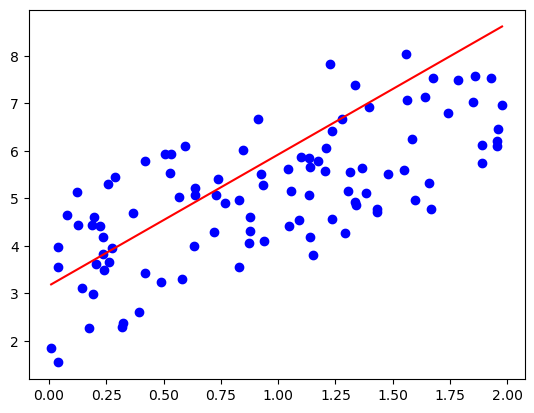

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(x, y, tau, x_query):
    w = np.exp(-((x - x_query)*2) / (2 * tau*2))
    X_b = np.c_[np.ones(len(x)), x]
    W = np.diag(w)
    theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    return np.array([1, x_query]) @ theta

np.random.seed(0)
x = np.sort(2 * np.random.rand(100))
y = 3 + 2*x + np.random.randn(100)
y = y[:, np.newaxis]

x_test = np.linspace(x.min(), x.max(), 100)
y_pred = [locally_weighted_regression(x, y, 0.1, xq) for xq in x_test]

plt.scatter(x, y, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.show()